In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
hotels = pd.read_excel("D:/STUDIES/Data Visualization/Data/HotelCustomersDataset.xlsx")

In [3]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
hotels.shape

(83590, 29)

In [5]:
hotels["date"] = (pd.to_datetime("2018-12-31")- pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [6]:
daily_revenue = hotels.groupby(['date']).agg({'LodgingRevenue':'sum', 'OtherRevenue':'sum'})

In [7]:
monthly_revenue = daily_revenue.resample('M').sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_154480\4181466696.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = daily_revenue.resample('M').sum()


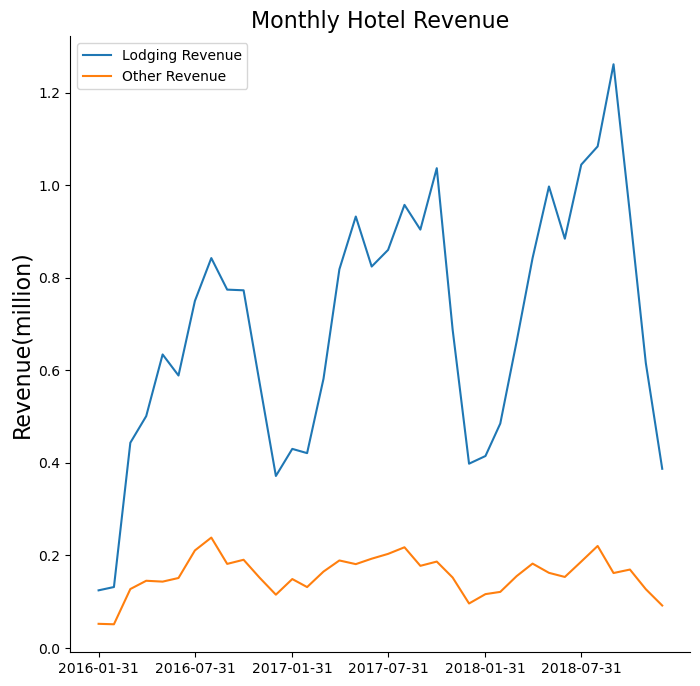

In [31]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue']/1000000, label = "Lodging Revenue")
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue']/1000000, label = "Other Revenue")

ax.set_title("Monthly Hotel Revenue", fontsize=16)
ax.set_ylabel("Revenue(million)", fontsize=16)
ax.set_xticks(monthly_revenue.index[::6])

ax.spines[['top', 'right']].set_visible(False)

ax.legend(loc="upper left")